This data I've used is for fetching trending youtube videos
Data is included for the USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, India and Japan.
And the most trending videos is determined by the following:
 - Number of Views
 - Comments
 - Number of shares on that video
 - Likes

The aim of this project is to:
- Get the top 5 videos that are trending in each country
- Most liked videos in each country
- Which category of videos have more likes
- Which category of videos do users comment most

Importing the necessary packages needed

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns
import re
import glob
import os
import json
import pickle
sns.set()
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None


These are the functions for the above imports
1. pandas - For data manipulation
2. numpy - For numerical python
3. matplotlib and seaborn - For visualizations
4. re(regular expressions) - Used to check if strings contain the specified match pattern
5. glob - Finds files that match specific patterns
6. os - For interacting with the operating system(Functions for working with files)
7. json - Working with json files
8. pickle - Serialization and deserialization of python objects

In [75]:
# Importing all csv files to my notebook

all_csv_files = [files for files in glob.glob(f"{'csv_files'}/*.csv")]
all_csv_files

['csv_files\\CAvideos.csv',
 'csv_files\\DEvideos.csv',
 'csv_files\\FRvideos.csv',
 'csv_files\\GBvideos.csv',
 'csv_files\\INvideos.csv',
 'csv_files\\JPvideos.csv',
 'csv_files\\KRvideos.csv',
 'csv_files\\MXvideos.csv',
 'csv_files\\RUvideos.csv',
 'csv_files\\USvideos.csv']

In [39]:
# Confirming it it's displayed
all_csv_files[0]

'csv_files\\CAvideos.csv'

In [40]:
# Converting the csv files to pandas dataframe

countries_df = []
for csv_file in all_csv_files:
    df = pd.read_csv(csv_file, encoding='latin-1')
    df['country'] = csv_file[10:12]  # Extracting the first 2 characters from the csv filename e.g CA
    countries_df.append(df)

countries_df[3].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [41]:
""" 
In the above cell, I've created an empty list to append the dataframe of each country after converting each csv file to
a pandas dataframe.
Then adding a column country to easily associate a dataframe to it's country
"""

" \nIn the above cell, I've created an empty list to append the dataframe of each country after converting each csv file to\na pandas dataframe.\nThen adding a column country to easily associate a dataframe to it's country\n"

Data Cleaning

In [42]:
# All countries have the same column names

# For France:

countries_df[2].dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [43]:
# Making the trending date column more readable

for country_df in countries_df:
    country_df[['Year','Day','Month']] = country_df['trending_date'].str.split('.',expand=True)

    # Converting the columns to integers
    country_df['Year'] = pd.to_numeric(country_df['Year']) + 2000
    country_df['Day'] = country_df['Day'].astype(int)
    country_df['Month'] = country_df['Month'].astype(int)

    # Creating a new column for the formatted date
    country_df['Trending_Formatted_Dates'] = pd.to_datetime(country_df[['Year','Month','Day']], format="%Y-%m-%d")

    # Dropping the trending date cause we do not need it
    country_df.drop(columns=['trending_date','Year','Day','Month'],axis=1,inplace=True)

country_df.head()



,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US,2017-11-14
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14


In [44]:
# Separating the publish time column into publish date and publish time
# Converting publish time to a string before separation

for country_df in countries_df:
    country_df['publish_time'] = country_df['publish_time'].astype('str')

    country_df['published_date'] = country_df['publish_time'].str.split('T').str[0]
    country_df['published_time'] = country_df['publish_time'].str.split('T').str[1]

    # Dropping the publish_time column
    country_df.drop(columns=['publish_time'],axis=1,inplace=True)

country_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14,2017-11-13,17:13:01.000Z
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14,2017-11-13,07:30:00.000Z
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US,2017-11-14,2017-11-12,19:05:24.000Z
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14,2017-11-13,11:00:04.000Z
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14,2017-11-12,18:01:41.000Z


In [45]:
#  Combining all dataframes and printing the first rows
merged_countries_df = pd.concat(countries_df)

merged_countries_df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14,2017-11-10,17:00:03.000Z
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14,2017-11-13,17:00:00.000Z
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14,2017-11-12,19:05:24.000Z
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14,2017-11-12,18:01:41.000Z
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14,2017-11-09,11:04:14.000Z


In [46]:
# Printing the last 5 rows of merged dataset.

merged_countries_df.tail()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
40944,BZt0qjTWNhw,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,2018-06-14,2018-05-18,13:00:04.000Z
40945,1h7KV2sjUWY,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US,2018-06-14,2018-05-18,01:00:06.000Z
40946,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,2018-06-14,2018-05-18,17:34:22.000Z
40947,oV0zkMe1K8s,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US,2018-06-14,2018-05-17,17:00:04.000Z
40948,ooyjaVdt-jA,Official Call of DutyÂ®: Black Ops 4 âÂ Mult...,Call of Duty,20,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-06-14,2018-05-17,17:09:38.000Z


In [47]:
# Info of the data

merged_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   video_id                  375942 non-null  object        
 1   title                     375942 non-null  object        
 2   channel_title             375942 non-null  object        
 3   category_id               375942 non-null  int64         
 4   tags                      375942 non-null  object        
 5   views                     375942 non-null  int64         
 6   likes                     375942 non-null  int64         
 7   dislikes                  375942 non-null  int64         
 8   comment_count             375942 non-null  int64         
 9   thumbnail_link            375942 non-null  object        
 10  comments_disabled         375942 non-null  bool          
 11  ratings_disabled          375942 non-null  bool          
 12  vid

In [48]:
# Checking for null values in the combined dataframe

merged_countries_df.isna().sum()

video_id                        0
title                           0
channel_title                   0
category_id                     0
tags                            0
views                           0
likes                           0
dislikes                        0
comment_count                   0
thumbnail_link                  0
comments_disabled               0
ratings_disabled                0
video_error_or_removed          0
description                 19478
country                         0
Trending_Formatted_Dates        0
published_date                  0
published_time                  0
dtype: int64

In [49]:
# Filling in null values

merged_countries_df['description'].fillna('No description',inplace=True)

# Checking if we've filled in null values
merged_countries_df.isna().sum()

video_id                    0
title                       0
channel_title               0
category_id                 0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                 0
country                     0
Trending_Formatted_Dates    0
published_date              0
published_time              0
dtype: int64

In [50]:
""" 
From the above, description has 19478 null values. That's not at least 50% of the data so we'll not get rid of that column
But we'll replace the missing values
"""

" \nFrom the above, description has 19478 null values. That's not at least 50% of the data so we'll not get rid of that column\nBut we'll replace the missing values\n"

In [51]:
""" 
After filling in null values, we can see above there are no missing values
"""

' \nAfter filling in null values, we can see above there are no missing values\n'

In [52]:
# Checking for statistics

merged_countries_df.describe()

,category_id,views,likes,dislikes,comment_count
count,375942.000000,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05
mean,20.232302,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03
std,7.132413,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02
50%,23.000000,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02
75%,24.000000,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [53]:
# Checking for duplicates in video_id

merged_countries_df.duplicated('video_id').value_counts()

""" 
We have 191655 duplicates in the column video id.
"""

' \nWe have 191655 duplicates in the column video id.\n'

In [54]:
# Removing duplicates

merged_countries_df.drop_duplicates('video_id',keep='first',inplace=True)

# Check for duplicates again to see if they were dropped
merged_countries_df.duplicated('video_id').sum()

0

In [55]:
""" 
As we've seen above, duplicates have been dropped

So we have no duplicates and we have no null values
"""

" \nAs we've seen above, duplicates have been dropped\n\nSo we have no duplicates and we have no null values\n"

In [56]:
merged_countries_df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,2017-11-14,2017-11-10,17:00:03.000Z
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14,2017-11-13,17:00:00.000Z
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,2017-11-14,2017-11-12,19:05:24.000Z
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14,2017-11-12,18:01:41.000Z
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,2017-11-14,2017-11-09,11:04:14.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40567,DjLr06pne6Q,Jorja Smith Gets Ready for Bed | Beauty Secret...,Vogue,26,"beauty|""beauty secrets""|""celebrity""|""celebrity...",279728,19691,135,579,https://i.ytimg.com/vi/DjLr06pne6Q/default.jpg,False,False,False,"âItâs not about looking cute,â says the ...",US,2018-06-13,2018-06-12,13:48:29.000Z
40751,8O-ZUXGcuWU,Nintendo @ E3 2018: Day 2,Nintendo,20,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",1549110,21905,1516,1318,https://i.ytimg.com/vi/8O-ZUXGcuWU/default.jpg,False,False,False,ESRB Rating: RATING PENDING to TEEN. Rating Pe...,US,2018-06-14,2018-06-14,01:31:53.000Z
40752,qPEIPu0V8GQ,Fortnite Celebrity Pro-Am | #FortniteProAm,Fortnite,20,"Fortnite|""Epic Games""|""PC""|""PS4""|""Xbox One""|""B...",2183462,79677,2034,3464,https://i.ytimg.com/vi/qPEIPu0V8GQ/default.jpg,False,False,False,50 gamers and 50 celebrities will pair up to b...,US,2018-06-14,2018-06-13,03:27:30.000Z
40760,dS5Thrl-4Kc,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol...",US,2018-06-14,2018-06-12,18:55:26.000Z


In [57]:
# Setting the index to video_ids
merged_countries_df.reset_index()

merged_countries_df.set_index('video_id')

# Sorting according to latest trending dates as latest so we can get current trends

merged_countries_df.sort_values('Trending_Formatted_Dates',ascending=False,inplace=True)

merged_countries_df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
40766,yz7Xq3T0YPs,"Katherine Langford on 13 Reasons Why, Australi...",Jimmy Kimmel Live,24,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",296295,8157,294,764,https://i.ytimg.com/vi/yz7Xq3T0YPs/default.jpg,False,False,False,"Katherine talks about learning accents, growin...",US,2018-06-14,2018-06-13,09:00:06.000Z
40679,wjL37AuZ51I,PES 2019 ÐÐ£ÐÐÐ¢ ÐÐ Ð£Ð§Ð FIFA 19,ÐÐ¸Ð±ÐµÑÐ±Ð¾Ð»,20,"PES 19|""pes19""|""pes 2019""|""PES 19 trailer""|""pe...",85112,4363,112,629,https://i.ytimg.com/vi/wjL37AuZ51I/default.jpg,False,False,False,PRO EVOLUTION SOCCER 2019 ÐÐ£ÐÐÐ¢ ÐÐ Ð£Ð§Ð...,RU,2018-06-14,2018-06-13,12:27:07.000Z
40673,UFHWjkohQKc,Ð¡Ð±Ð¾ÑÐ½Ð°Ñ Ð Ð¾ÑÑÐ¸Ð¸ Ð½Ð° Ð§Ð-2018: Ð½...,Ð£Ð¿ÑÐ°Ð²Ð»ÑÐµÐ¼ÑÐ¹ Ñ Ð°Ð¾Ñ. Ð§ÐµÐ¼Ð¿Ð¸Ð¾Ð...,17,"ÐÐ¸Ñ Ð°Ð¸Ð» ÐÐ¾ÑÐ·ÑÐºÐ¸Ð½|""ÐÐ¾ÑÐ·ÑÐºÐ¸Ð...",52199,1620,612,653,https://i.ytimg.com/vi/UFHWjkohQKc/default.jpg,False,False,False,ÐÐ¸Ñ Ð°Ð¸Ð» ÐÐ¾ÑÐ·ÑÐºÐ¸Ð½ Ð·Ð° Ð´ÐµÐ½Ñ Ð´...,RU,2018-06-14,2018-06-13,10:53:57.000Z
40674,ha1bmKZ94RM,ÐÑÐµ Ð¢Ð¾Ð¼Ð°ÑÑ ÐÑÐ´ÑÑ Ð ÐÐ°Ð²ÑÐ·Ð¸...,ÐÐ¾ ÑÐ°Ð´Ñ Ð»Ð¸ Ð² Ð¾Ð³Ð¾ÑÐ¾Ð´Ðµ,22,"ÐÐ¾ ÑÐ°Ð´Ñ Ð»Ð¸ Ð² Ð¾Ð³Ð¾ÑÐ¾Ð´Ðµ|""Ð¼Ð¸Ð½Ñ...",75567,2203,172,228,https://i.ytimg.com/vi/ha1bmKZ94RM/default.jpg,False,False,False,"Ð¢Ð¾Ð¼Ð°ÑÑ. Ð¢Ð¾Ð¼Ð°ÑÑ Ð² ÑÐµÐ¿Ð»Ð¸ÑÐµ, ...",RU,2018-06-14,2018-06-13,11:03:58.000Z
40675,LB32UJEKMQY,Ð£ Ð ÐÐÐÐ ÐÐÐÐ«Ð Ð¢Ð ÐÐÐÐ !! ÐÐ Ð...,Ð¢Ð²Ð¾Ð¹ Ð¤ÑÑÐ±Ð¾Ð»,17,"Ð½Ð¾Ð²ÑÐ¹ ÑÑÐµÐ½ÐµÑ ÑÐµÐ°Ð»Ð°|""Ð»Ð¾Ð¿ÐµÑ...",122444,4628,240,1618,https://i.ytimg.com/vi/LB32UJEKMQY/default.jpg,False,False,False,ÐÐ°Ð½Ð°Ð» 1xbet Ð½Ð° Youtube - https://goo.g...,RU,2018-06-14,2018-06-13,13:00:03.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,UtqE056lqas,Lagira Zhala Jee - à¤²à¤à¤¿à¤°à¤¾ à¤à¤²à¤¾ à...,zeemarathi,24,"Zee marathi|""Lagira Zhala Jee""|""full episode""|...",78447,241,11,13,https://i.ytimg.com/vi/UtqE056lqas/default.jpg,False,False,False,http://www.ozee.com/shows/lagira-zhala-jee - C...,IN,2017-11-14,2017-11-12,02:23:48.000Z
98,ZJaR1RPrvkA,à¤à¥à¤¸à¤¾à¤°à¥ à¤²à¤¾à¤² à¤à¥ à¤à¤¿à¤à...,Bhojpuri Tube,24,"Bhojpuri|""bhojpurinew""|""bhojpuritube""|""tubebho...",218178,1373,214,118,https://i.ytimg.com/vi/ZJaR1RPrvkA/default.jpg,False,False,False,à¤à¥à¤¸à¤¾à¤°à¥ à¤²à¤¾à¤² à¤à¥ à¤à¤¿à¤à...,IN,2017-11-14,2017-11-11,07:09:11.000Z
99,7HTw1Jz5lcQ,à²¬à²¿à²à³ à²¬à²¾à²¸à³ à²à²¦à²° à²¶à³à²°à...,SANDALWOOD REVIEWS,1,"big boss|""kannada big boss rich and poor conte...",103665,566,66,76,https://i.ytimg.com/vi/7HTw1Jz5lcQ/default.jpg,False,False,False,big boss poor contestant,IN,2017-11-14,2017-11-11,03:36:47.000Z
101,NgEgYjvh6rE,FilterCopy | Types Of Men You Meet On A Date |...,FilterCopy,23,"irrfan|""khan""|""parvathy""|""QQS""|""Qarib Qarib Si...",1014724,25413,891,1030,https://i.ytimg.com/vi/NgEgYjvh6rE/default.jpg,False,False,False,We've all been on dates that we've repented. W...,IN,2017-11-14,2017-11-09,06:39:48.000Z


In [58]:
# From Json files we have title related to category id
# Reading two json files to see if they have similar data

with open('json_files/CA_category_id.json', 'r') as f:
    canada_file = f.read()

# parsing file
obj = json.loads(canada_file)

# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [59]:
# Reading another json file to compare results to spot any similarity
with open('json_files/IN_category_id.json') as f:
    india_data = f.read()

# Parsing the data
obj = json.loads(india_data)

obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [60]:
""" 
As we can see, both datasets have similar title data.
So we'll map that to category id in our merged table by adding another column called category.
"""

" \nAs we can see, both datasets have similar title data.\nSo we'll map that to category id in our merged table by adding another column called category.\n"

In [61]:
""" 
Below, we're going to add the category column and input values from the title key in our dictionaries by mapping those
values to our dictionary key
"""

" \nBelow, we're going to add the category column and input values from the title key in our dictionaries by mapping those\nvalues to our dictionary key\n"

In [62]:

# Initializing an empty dictionary
category_id = {}

# Opening one of the json files as they all have the same data
with open('json_files/GB_category_id.json') as f:
    gb_file = json.load(f)

# Looping through the items which is a list of dictionaries to access the titles
    for category in gb_file['items']:
        category_id[str(category['id'])] = category['snippet']['title']

# Checking if the category column exists in our merged dataframe , if yes, drop it first
    if 'category' in merged_countries_df:
            merged_countries_df.drop(columns='category',axis=1,inplace=True)
    

# Convert the category_id column in the dataframe to strings for correct mapping
    merged_countries_df['category_id'] = merged_countries_df['category_id'].astype(str)

# Creating a new category column
    merged_countries_df.insert(3,'category', merged_countries_df['category_id'].map(category_id))


merged_countries_df.head()


,video_id,title,channel_title,category,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
40766,yz7Xq3T0YPs,"Katherine Langford on 13 Reasons Why, Australi...",Jimmy Kimmel Live,Entertainment,24,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",296295,8157,294,764,https://i.ytimg.com/vi/yz7Xq3T0YPs/default.jpg,False,False,False,"Katherine talks about learning accents, growin...",US,2018-06-14,2018-06-13,09:00:06.000Z
40679,wjL37AuZ51I,PES 2019 ÐÐ£ÐÐÐ¢ ÐÐ Ð£Ð§Ð FIFA 19,ÐÐ¸Ð±ÐµÑÐ±Ð¾Ð»,Gaming,20,"PES 19|""pes19""|""pes 2019""|""PES 19 trailer""|""pe...",85112,4363,112,629,https://i.ytimg.com/vi/wjL37AuZ51I/default.jpg,False,False,False,PRO EVOLUTION SOCCER 2019 ÐÐ£ÐÐÐ¢ ÐÐ Ð£Ð§Ð...,RU,2018-06-14,2018-06-13,12:27:07.000Z
40673,UFHWjkohQKc,Ð¡Ð±Ð¾ÑÐ½Ð°Ñ Ð Ð¾ÑÑÐ¸Ð¸ Ð½Ð° Ð§Ð-2018: Ð½...,Ð£Ð¿ÑÐ°Ð²Ð»ÑÐµÐ¼ÑÐ¹ Ñ Ð°Ð¾Ñ. Ð§ÐµÐ¼Ð¿Ð¸Ð¾Ð...,Sports,17,"ÐÐ¸Ñ Ð°Ð¸Ð» ÐÐ¾ÑÐ·ÑÐºÐ¸Ð½|""ÐÐ¾ÑÐ·ÑÐºÐ¸Ð...",52199,1620,612,653,https://i.ytimg.com/vi/UFHWjkohQKc/default.jpg,False,False,False,ÐÐ¸Ñ Ð°Ð¸Ð» ÐÐ¾ÑÐ·ÑÐºÐ¸Ð½ Ð·Ð° Ð´ÐµÐ½Ñ Ð´...,RU,2018-06-14,2018-06-13,10:53:57.000Z
40674,ha1bmKZ94RM,ÐÑÐµ Ð¢Ð¾Ð¼Ð°ÑÑ ÐÑÐ´ÑÑ Ð ÐÐ°Ð²ÑÐ·Ð¸...,ÐÐ¾ ÑÐ°Ð´Ñ Ð»Ð¸ Ð² Ð¾Ð³Ð¾ÑÐ¾Ð´Ðµ,People & Blogs,22,"ÐÐ¾ ÑÐ°Ð´Ñ Ð»Ð¸ Ð² Ð¾Ð³Ð¾ÑÐ¾Ð´Ðµ|""Ð¼Ð¸Ð½Ñ...",75567,2203,172,228,https://i.ytimg.com/vi/ha1bmKZ94RM/default.jpg,False,False,False,"Ð¢Ð¾Ð¼Ð°ÑÑ. Ð¢Ð¾Ð¼Ð°ÑÑ Ð² ÑÐµÐ¿Ð»Ð¸ÑÐµ, ...",RU,2018-06-14,2018-06-13,11:03:58.000Z
40675,LB32UJEKMQY,Ð£ Ð ÐÐÐÐ ÐÐÐÐ«Ð Ð¢Ð ÐÐÐÐ !! ÐÐ Ð...,Ð¢Ð²Ð¾Ð¹ Ð¤ÑÑÐ±Ð¾Ð»,Sports,17,"Ð½Ð¾Ð²ÑÐ¹ ÑÑÐµÐ½ÐµÑ ÑÐµÐ°Ð»Ð°|""Ð»Ð¾Ð¿ÐµÑ...",122444,4628,240,1618,https://i.ytimg.com/vi/LB32UJEKMQY/default.jpg,False,False,False,ÐÐ°Ð½Ð°Ð» 1xbet Ð½Ð° Youtube - https://goo.g...,RU,2018-06-14,2018-06-13,13:00:03.000Z


In [63]:
""" 
We now have the titles in the category column 
"""

' \nWe now have the titles in the category column \n'

Exploratory Data Analysis

1. Top 5 videos trending in each country

In [64]:
# Group the merged df by country
grouped = merged_countries_df.groupby('country')

# Initializing an empty list to append the dataframes
sorted_groups = []

# Looping through each group that represents a specific country
for country, group in grouped:

    # Sorting each group based on Trending dates
    sorted_values = group.sort_values(by='Trending_Formatted_Dates',ascending=False)

    # Fetching top 5 videos of each group
    top_5_videos = sorted_values.head()
    sorted_groups.append(top_5_videos)

# Accessing the first group in the list
# sorted_groups[0]


# Concatenate sorted groups to a single dataframe
top_5_videos = pd.concat(sorted_groups)
top_5_videos

,video_id,title,channel_title,category,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Trending_Formatted_Dates,published_date,published_time
40833,X5UrtwW-zJs,FAST 12TB Steam Drive for CHEAP!!,Linus Tech Tips,Science & Technology,28,"intel|""optane""|""steam""|""12tb""|""storage""|""drive...",476011,19964,1248,2379,https://i.ytimg.com/vi/X5UrtwW-zJs/default.jpg,False,False,False,Thanks to Intel for sponsoring this video. Lea...,CA,2018-06-14,2018-06-13,19:52:42.000Z
40725,zauQhWWpa0s,Ù Ø³ÙØ³Ù Ø±Ø­ÙÙ Ø§ÙØ­ÙÙØ© 29 Ø§ÙØªØ§Ø³...,Egyptian Arts Group,Entertainment,24,"Ù Ø³ÙØ³Ù Ø±Ø­ÙÙ |""Ø±Ù Ø¶Ø§Ù 2018""|""Ù Ø³ÙØ...",1039046,8000,681,2045,https://i.ytimg.com/vi/zauQhWWpa0s/default.jpg,False,False,False,Ø§ÙØ­ÙÙØ© 29 Ø§ÙØªØ§Ø³Ø¹Ø© ÙØ§ÙØ¹Ø´Ø±ÙÙ...,CA,2018-06-14,2018-06-13,23:34:13.000Z
40778,zaXplMvTmSg,"RESIGN IMMEDIATELY!, Jim Jordan Got Very Angry...",True American Heroes,News & Politics,25,"true american heroes|""jim jordan""|""jim joradan...",68829,1926,68,1088,https://i.ytimg.com/vi/zaXplMvTmSg/default.jpg,False,False,False,Laura Ingraham invited Reps Mark Meadows (R-NC...,CA,2018-06-14,2018-06-13,16:30:01.000Z
40791,i42BGL89Gfo,Ù Ø³ÙØ³Ù ÙÙØ¶Ù Ø§ÙØ­ÙÙØ© 28 Ø§ÙØ«Ø§Ù ...,Sma Al Fan Production International Ø³Ù Ø§ Ø§Ù...,People & Blogs,22,"Ø³ÙÙÙ Ø­Ø¯Ø§Ø¯|""ÙÙØ¶Ù""|""Ù Ø³ÙØ³Ù ÙÙØ...",144536,978,88,705,https://i.ytimg.com/vi/i42BGL89Gfo/default.jpg,False,False,False,Fawda Series Ù Ø³ÙØ³Ù ÙÙØ¶Ù ÙØ§Ø­Ø¯ Ù Ù...,CA,2018-06-14,2018-06-13,20:00:01.000Z
40740,jnFn3Dlcfgs,Ù Ø³ÙØ³Ù ÙØ±Ø¯Ø© Ø´Ø§Ù ÙØ© Ù Ø§ÙØ­ÙÙØ©...,Golden Line for TV Production and Distribution,People & Blogs,22,[none],308151,2244,227,800,https://i.ytimg.com/vi/jnFn3Dlcfgs/default.jpg,False,False,False,ØªØ¯ÙØ± Ø£Ø­Ø¯Ø§Ø«Ù ÙÙ Ø¥Ø·Ø§Ø± Ø§ÙØ¥Ø«Ø§...,CA,2018-06-14,2018-06-13,19:30:00.000Z
40832,6wb8rqDeMlU,FarmVLOG#120 - Heu rein...GÃ¼lle raus,Sibbershusum,Autos & Vehicles,2,"Agrarvlog|""Agarblog""|""Deutz""|""Deutz-Fahr""|""DX""...",31283,1914,16,373,https://i.ytimg.com/vi/6wb8rqDeMlU/default.jpg,False,False,False,Hier gibt es viele INFOS Mein Shop: https://sh...,DE,2018-06-14,2018-06-13,16:00:01.000Z
40718,ZX1OmtsOEm4,Talat Bulut hakkÄ±nda korkunÃ§ iddialar!,SÃ¶ylemezsem Olmaz,People & Blogs,22,"cinsel istismar|""cinsel saldÄ±rÄ±""|""talat bulu...",66326,185,58,244,https://i.ytimg.com/vi/ZX1OmtsOEm4/default.jpg,False,False,False,No description,DE,2018-06-14,2018-06-13,08:46:31.000Z
40776,mSJ_Qb9-WtA,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,Talent Recap,Entertainment,24,"Americaâs got talent|""Americas got talent""|""...",560827,8688,147,696,https://i.ytimg.com/vi/mSJ_Qb9-WtA/default.jpg,False,False,False,#Full Segment | Americaâs Got Talent Season ...,DE,2018-06-14,2018-06-13,01:36:56.000Z
40773,RFCnZLNwLsY,GuÌlduÌr GuÌlduÌr Show 183. BoÌluÌm | Da...,GÃ¼ldÃ¼r GÃ¼ldÃ¼r,Comedy,23,"gÃ¼ldÃ¼r|""guldur""|""guldur guldur""|""gÃ¼ldÃ¼r gÃ...",238712,1896,124,129,https://i.ytimg.com/vi/RFCnZLNwLsY/default.jpg,False,False,False,EkranlarÄ±n yepyeni formatÄ± âDamadÄ±m olur ...,DE,2018-06-14,2018-06-12,20:07:17.000Z
40772,qLM1NA272v0,Ø­ØµØ±Ù/ Ø´Ø§ÙØ¯ Ù Ø§Ø°Ø§ ÙØ¹Ù Ù Ø´Ø¬Ø¹ÙÙ...,Elbotola,Sports,17,"Elbotola.com|""elbotolatv""|""elbotolaMedia""|""Ø§Ù...",179322,1890,346,2229,https://i.ytimg.com/vi/qLM1NA272v0/default.jpg,False,False,False,Ø§Ø¶ØºØ· Ù Ø§Ø´ØªØ±Ù ÙÙ ÙÙØ§ØªÙØ§ : htt...,DE,2018-06-14,2018-06-13,20:59:22.000Z


2. Most liked video and most trending video

In [65]:
# Initializing an empty list to store most liked videos in each country

most_liked_videos = []

for country_df in countries_df:
    # Sorting values by likes
    country_df = country_df.sort_values(by= ['likes'] ,ascending=False)
    
    # Dropping duplicates if they exist
    country_df.drop_duplicates(subset='video_id',keep='first',inplace=True)
        
    top_5_liked =  country_df.head()
    most_liked_videos.append(top_5_liked)

# Accessing the 7th country
# most_liked_videos[7][['views', 'likes']]

# Concatenating all dataframes
videos_liked = pd.concat(most_liked_videos)
videos_liked[['views', 'likes','country','title']]

# Accessing for canada only for example
# videos_liked[['views', 'likes','country']][0:5]

,views,likes,country,title
36453,80738011,5053338,CA,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV
34361,98938809,3037318,CA,Childish Gambino - This Is America (Official V...
5900,137843120,3014479,CA,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4699,89930713,2606665,CA,Marvel Studios' Avengers: Infinity War Officia...
2873,27670973,2542863,CA,BTS (ë°©íìë ë¨) 'MIC Drop (Steve Aoki Re...
36291,73463137,4924056,DE,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV
5455,113876217,2811217,DE,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4062,80360459,2513103,DE,Marvel Studios' Avengers: Infinity War Officia...
34104,73432600,2478908,DE,Childish Gambino - This Is America (Official V...
2780,24628712,2454901,DE,BTS (ë°©íìë ë¨) 'MIC Drop (Steve Aoki Re...


In [66]:
videos_liked.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'Trending_Formatted_Dates', 'published_date',
       'published_time'],
      dtype='object')

3. Which category of videos have more likes

In [67]:
""" 
We can get the top 5 categories from videos with most likes
"""

' \nWe can get the top 5 categories from videos with most likes\n'

In [68]:
most_liked_videos = []

for country_df in countries_df:
    # Sort values by likes
    country_df = country_df.sort_values(by='likes', ascending=False)
    
    # Drop duplicates based on 'video_id'
    country_df.drop_duplicates(subset='video_id', keep='first', inplace=True)

    top_5_liked = country_df.head()
    most_liked_videos.append(top_5_liked)

# Accessing the 7th country
most_liked_videos[7][['views', 'likes']]

# Concatenating all dataframes
videos_liked = pd.concat(most_liked_videos)
videos_liked[['views', 'likes', 'country', 'channel_title']]

# Accessing for Canada only for example
# videos_liked[['views', 'likes', 'country', 'category']][0:5]


,views,likes,country,channel_title
36453,80738011,5053338,CA,ibighit
34361,98938809,3037318,CA,ChildishGambinoVEVO
5900,137843120,3014479,CA,YouTube Spotlight
4699,89930713,2606665,CA,Marvel Entertainment
2873,27670973,2542863,CA,ibighit
36291,73463137,4924056,DE,ibighit
5455,113876217,2811217,DE,YouTube Spotlight
4062,80360459,2513103,DE,Marvel Entertainment
34104,73432600,2478908,DE,ChildishGambinoVEVO
2780,24628712,2454901,DE,ibighit


4. Which overall category of videos do users comment most

In [69]:
most_commented_videos = []

for country_df in countries_df:

    if 'category' not in country_df:
        country_df = country_df.merge(merged_countries_df[['video_id', 'category']], on='video_id', how='left')

    # Sort values by likes
    country_df = country_df.sort_values(by='comment_count', ascending=False)

    top_5_commented = country_df.head()
    most_commented_videos.append(top_5_commented)

# Accessing the 7th country
# most_commented_videos[7][['views', 'likes']]

# Concatenating all dataframes
videos_commented = pd.concat(most_commented_videos)
videos_commented[['views', 'likes', 'comment_count', 'country', 'category']]

,views,likes,comment_count,country,category
36453,80738011,5053338,1114800,CA,Music
36153,73463137,4924056,1084435,CA,Music
35900,65396157,4750254,1040912,CA,Music
35685,62796390,4470888,905912,CA,Music
4996,75969469,2251826,827755,CA,Entertainment
36291,73463137,4924056,1084435,DE,Music
35954,65396157,4750254,1040912,DE,Music
35699,62796390,4470888,905912,DE,Music
5004,75969469,2251819,827755,DE,Entertainment
5455,113876217,2811217,787174,DE,Entertainment


In [70]:
temp =  merged_countries_df.groupby('category')[['views', 'likes', 'comment_count']].agg('sum')
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

,views,likes,comment_count
category,,,
Entertainment,10843496033,356406694,54064063
Music,4770035053,248765865,23381489
People & Blogs,3749554646,124930558,20394603
Comedy,2837959819,165274771,19205867
News & Politics,2463229152,44092067,12176381


5. Ratio of likes and dislikes

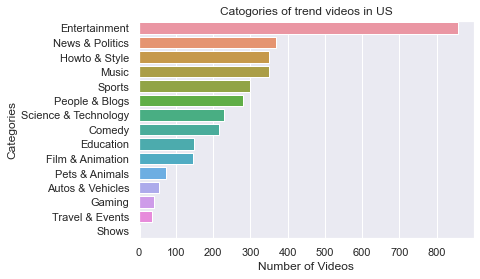

In [71]:
for country_df in countries_df:
    if country == 'US':
        tempdf = merged_countries_df[merged_countries_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = merged_countries_df[merged_countries_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()